In [1]:
from setup_notebook import set_path_to_root

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from data.preprocess import load_preprocessed_data

### Load data

In [2]:
prices = load_preprocessed_data(3)
prices.set_index(['datetime'], inplace=True)

Local DB found, checking for updated data...
Progress 0/144
Progress 1/144
Progress 2/144
Progress 3/144
Progress 4/144
Progress 5/144
Progress 6/144
Progress 7/144
Progress 8/144
Progress 9/144
Progress 10/144
Progress 11/144
Progress 12/144
Progress 13/144
Progress 14/144
Progress 15/144
Progress 16/144
Progress 17/144
Progress 18/144
Progress 19/144
Progress 20/144
Progress 21/144
Progress 22/144
Progress 23/144
Progress 24/144
Progress 25/144
Progress 26/144
Progress 27/144
Progress 28/144
Progress 29/144
Progress 30/144
Progress 31/144
Progress 32/144
Progress 33/144
Progress 34/144
Progress 35/144
Progress 36/144
Progress 37/144
Progress 38/144
Progress 39/144
Progress 40/144
Progress 41/144
Progress 42/144
Progress 43/144
Progress 44/144
Progress 45/144
Progress 46/144
Progress 47/144
Progress 48/144
Progress 49/144
Progress 50/144
Progress 51/144
Progress 52/144
Progress 53/144
Progress 54/144
Progress 55/144
Progress 56/144
Progress 57/144
Progress 58/144
Progress 59/144
Progr

Take a sample of clustered items for proof of concept

In [3]:
item_subset = [560, 4207, 4736, 11785, 11840, 11889, 22003, 22446, 23959, 24635]
prices = prices[prices['item_id'].isin(item_subset)]

In [4]:
print(f"Selected items: {prices.name.unique()}")

Selected items: ['Death rune' 'Crystal weapon seed' "Karil's leathertop"
 'Armadyl crossbow' 'Dragon boots' 'Zamorakian hasta' 'Dragonfire ward'
 'Vial of blood' 'Enhanced crystal teleport seed'
 'Divine bastion potion(4)']


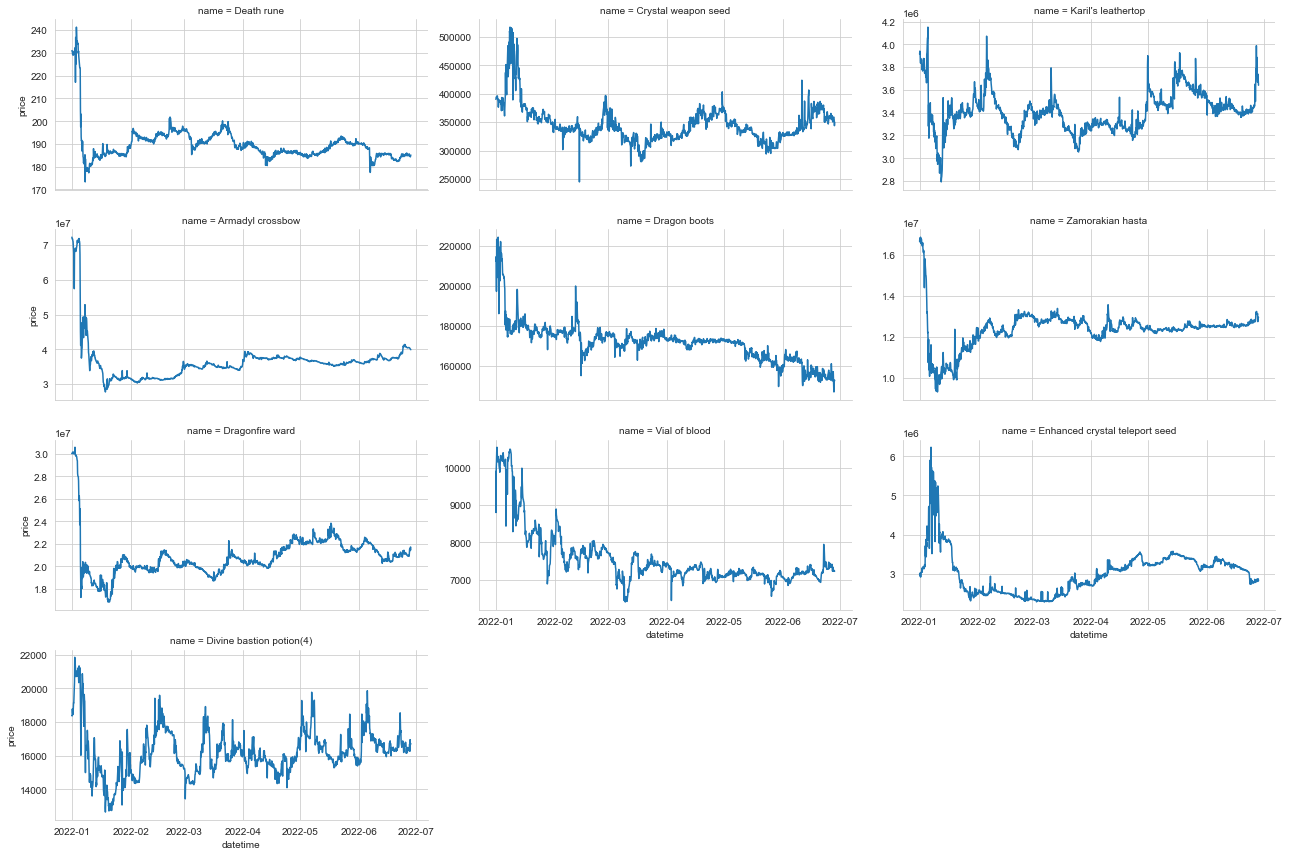

In [5]:
g = sns.FacetGrid(prices.reset_index(), col='name', col_wrap=3, sharey=False, height=3, aspect=2)
g.map(sns.lineplot, 'datetime', 'price')

### Preprocess data

In [6]:
df = prices[['item_id', 'price']]

In [7]:
df.head(15)

,item_id,price
datetime,,
2022-01-01 00:00:00,560,231.000000
2022-01-01 03:00:00,560,231.000000
2022-01-01 06:00:00,560,230.500000
2022-01-01 09:00:00,560,229.333333
2022-01-01 12:00:00,560,229.500000
2022-01-01 15:00:00,560,229.000000
2022-01-01 18:00:00,560,229.166667
2022-01-01 21:00:00,560,229.166667
2022-01-02 00:00:00,560,230.000000


### Model

In [8]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer

ModuleNotFoundError: No module named 'mxnet'

In [19]:
prices.head()

,item_id,name,price,margin,volume
datetime,,,,,
2022-01-01 00:00:00,560,Death rune,231.000000,2.666667,3311466.0
2022-01-01 03:00:00,560,Death rune,231.000000,4.000000,3741760.0
2022-01-01 06:00:00,560,Death rune,230.500000,4.333333,2293052.0
2022-01-01 09:00:00,560,Death rune,229.333333,3.333333,1805366.0
2022-01-01 12:00:00,560,Death rune,229.500000,5.000000,2789971.0


In [24]:
training_data = ListDataset(
    [{"start": prices.index[0], "target": prices['price'], }],
    freq = "3H"
)